# Laboratorio 2: Herramienta para la caracterízación de muestras de polvo de acero mediante procesamiento de imágen.

**Equipo:** 04  (Grupo 17)<br>
**Alumnos:** Pablo García Catalán, Adán Piñero Alquegui, Asier Balza de Vallejo Julián, Alejandro León Alonso.<br>
**Asignatura:** Percepción computacional 2020-21.<br>
**Voluntarios presentación:** Los cuatro integrantes del grupo <br>
**Enlace repositorio:** https://github.com/adanpinnero/PercepcionAct02 <br>

| <div style="text-align: center"> Alumno </div>| Asistencias a reuniones (0-3) | Entregas realizadas (0-3) |
| --- | --- | --- |
| <div style="text-align: left"> Pablo García Catalán </div> | 3 | 3 |
| <div style="text-align: left"> Adán Piñero Alquegui </div> | 3 | 3 |
| <div style="text-align: left"> Asier Balza de Vallejo Julián </div> | 3 | 3 |
| <div style="text-align: left"> Alejandro León Alonso </div> | 3 | 3 |

**Índice:** <br>

1. Planteamiento del problema<br>
2. Ventajas de la caracterización por imagen<br>
3. Desarrollo de la herramienta de caracterización de polvo<br>
    3.1 Umbralización de la imagen<br>
    3.2 Funciones de erosión, dilatación y apertura<br>
    3.3 Pruebas de la función de apertura<br>
4. Función para caracterizar la muestra<br>
5. Ejemplos de uso<br>
6. Conclusión<br>

#### 1.- Planteamiento del problema.
La caracterización de materiales compuestos de polvo de diferente granulometría es un problema de especial interés en la impresión directa de metal. La impresión consiste en la deposición superpuesta de finas capas de polvo que es solidificado por laser. El control de la composición granulométrica del polvo es necesaria para asegurar la calidad de la impresión.<br>
Es posible obtener imágenes microscópicas de estas muestras, por lo que se aboradará la caracterización de las mismas mediante el procesamiento de imágenes.
A continuación se muestran tres imágenes de polvo de acero, tomadas por un microscopio SEM con tamaños entre las 20 y las 63 micras.

Text(0.5, 1.0, 'Muestra 3 Original')

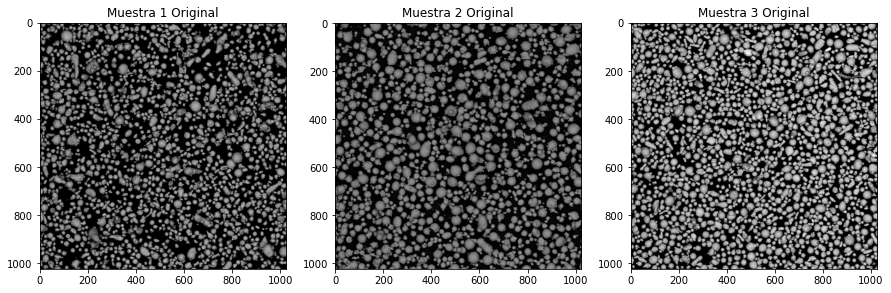

In [1]:
import matplotlib.pyplot as plt
from skimage import io
img1 = io.imread('f201.tiff')
img2 = io.imread('f202.tiff')
img3 = io.imread('f203.tiff')
fig1, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,15))
axs[0].imshow(img1)
axs[0].set_title("Muestra 1 Original")
axs[1].imshow(img2)
axs[1].set_title("Muestra 2 Original")
axs[2].imshow(img3)
axs[2].set_title("Muestra 3 Original")

#### 2.- Ventajas de la caracterización por imagen.
La caracterización del polvo de acero por imágenes presenta ventajas e inconvenientes frente a otros métodos existentes en el mercado.<br>

| <div style="text-align: center"> Técnicas </div>| Ventajas | Inconvenientes |
| --- | --- | --- |
| <div style="text-align: left"> Óptico (propuesto) </div> | Tecnología polivalente, que puede adaptarse facilmente a diferentes necesidades modificando el algorimo, no la infraestructura. Rápido y posibilita un control en tiempo real. Permite guardar las imagenes para asegurar control de calidad. | Otras técnicas más exactas. No diferencia polvo no magnético en la muestra. |
| <div style="text-align: left"> Tamizado mecánico </div> | Se ajusta al comportamiento físico de las partículas en condiciones similares a las de deposición en la impresión. Exactitud. | Lento. No implementable en tiempo real. |
| <div style="text-align: left"> Electromagnético </div> | Diferencia partículas no metálicas. Exactitud. | Coste más elevado |
| <div style="text-align: left"> Dispersión de luz </div> | Útil en determinadas muestras o condiciones de trabajo | Complejidad y versatilidad de los equipos |
| <div style="text-align: left"> Sedimentación </div> | Equipamiento de laboratorio asequible.| Lento |

Conclusiones obtenidas a partir de la descripción de las técnicas del documento Caracterización de Polvos Metálicos, de Juan Pablo Acero Garcia. <br>
(https://repositorio.uniandes.edu.co/bitstream/handle/1992/15754/u239254.pdf)

#### 3.- Desarrollo de la herramienta de caracterización de polvo por procesamiento de imágen.<br>
La herramienta obtendrá la distribución de partículas de diferentes tamaños. Para ello se prevé un algorimo que realice aperturas de la imagen con elementos de tamaño incremental. De esta forma se producirá un tamizado de la imagen, análogo al tamizado mecánico pudiendose así caracterizar la muestra.
Nótese que no se utiliza ninguna función de la biblioteca skimage.morphology, son todas desarrolladas ad hoc para el ejercicio

#### 3.1 Umbralización de la imagen
Para trabajar de forma más eficaz se convierte la imagen a escala de grises.

Text(0.5, 1.0, 'Muestra 3 Grayscale')

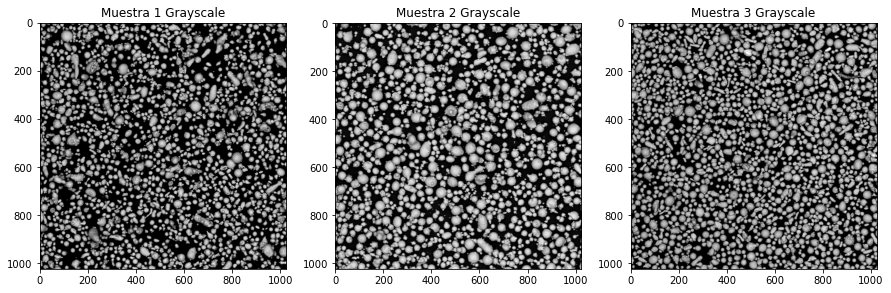

In [2]:
from skimage.color import rgb2hsv,rgb2gray,rgba2rgb

img1_grayscale = rgb2gray(rgba2rgb(img1))
img2_grayscale = rgb2gray(rgba2rgb(img2))
img3_grayscale = rgb2gray(rgba2rgb(img3))

fig2, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,15))
axs[0].imshow(img1_grayscale,cmap='gray')
axs[0].set_title("Muestra 1 Grayscale")
axs[1].imshow(img2_grayscale,cmap='gray')
axs[1].set_title("Muestra 2 Grayscale")
axs[2].imshow(img3_grayscale,cmap='gray')
axs[2].set_title("Muestra 3 Grayscale")

Se umbraliza la imagen,de tal forma que sea posible la diferenciación clara entre el background y el foreground.


Text(0.5, 1.0, 'Muestra 1 Threshold')

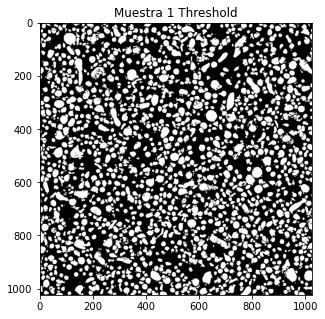

In [3]:
from skimage.filters import threshold_yen
thresh = threshold_yen(img1_grayscale)
img1_binary = img1_grayscale >= thresh
fig1, axs = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
axs.imshow(img1_binary,cmap='gray')
axs.set_title("Muestra 1 Threshold")

#### 3.2 Algoritmo de erosión y dilatación
Se desarrolla un algorirmo de apertura para una imagen. Si bien estos algoritmos están implementados en librerias existentes se desarrolla íntegramente como parte de la actividad.
La apertura consiste en la aplicación de una erosión y una dilatación.

El algoritmo original consumía cerca de 12 segundos por cada apertura de imagen, por lo que se implementó una solución con numba, que utliza operaciones de más bajo nivel acelerando el algorimo a 2 segundos por apertura.

Se ha optado además por implementar propiamente el elemento estructural, para cuatro formas diferentes: cuadrado, rombo, disco o estrella.

In [4]:
import math
import numpy as np

# devuelve un elemento estructural en matriz booleana
# puede ser cuadrado, rombo, disco o estrella
def elem_struct(forma,radio):
    dimension = 2*radio + 1
    elem_struct=np.zeros((dimension,dimension),dtype= bool)
    if (forma=="square"):
        for i in range(radio+1):
            for j in range(radio+1):
                elem_struct[radio+i][radio+j]=True
        return unfold(elem_struct)
    elif (forma=="diamond"):
        for i in range(radio+1):
            for j in range(radio+1):
                if (i+j)<(radio+1):
                    elem_struct[radio+i][radio+j]=True
        return unfold(elem_struct)
    elif (forma=="disk"):
        radio2 = radio**2
        for i in range(radio+1):    
            for j in range(radio+1):
                x2 = i**2
                y2 = j**2
                if ((radio2) >= (x2+y2)): 
                    elem_struct[radio+i][radio+j]=True
        return unfold(elem_struct)
    elif (forma=="star"):
        radio_23=int(2*radio/3)
        for i in range(radio+1):
            for j in range(radio+1):
                if(((i<radio_23+1)and(j<radio_23+1))or((i+j)<(radio+1))):
                    elem_struct[radio+i][radio+j]=True
        return unfold(elem_struct)
    else: 
        print("forma no soportada")
        return -1

#El algoritmo principal sólo construye un cuadrante de el elemento estructural
#este despliega el resto con respecto a los dos ejes de simetria
def unfold(st_elem):
    radio=int(st_elem.shape[0]/2)
    for i in range(radio+1):
        for j in range(radio+1):
            st_elem[radio-i][radio-j]=st_elem[radio+i][radio+j]
            st_elem[radio+i][radio-j]=st_elem[radio+i][radio+j]
            st_elem[radio-i][radio+j]=st_elem[radio+i][radio+j]
    return st_elem

Se muestra el aspecto de los elementos estrucutales generados para ciertos radios, a modo de ejemplo.

Text(0.5, 1.0, 'Estrella 10')

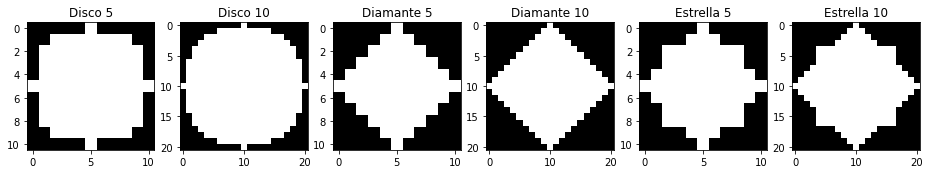

In [5]:
disk5=elem_struct("disk",5)
disk10=elem_struct("disk",10)
diam5=elem_struct("diamond",5)
diam10=elem_struct("diamond",10)
star5=elem_struct("star",5)
star10=elem_struct("star",10)

fig1, axs = plt.subplots(ncols=6,nrows=1, figsize=(16, 16))
axs[0].imshow(disk5,cmap='gray')
axs[0].set_title("Disco 5")
axs[1].imshow(disk10,cmap='gray')
axs[1].set_title("Disco 10")
axs[2].imshow(diam5,cmap='gray')
axs[2].set_title("Diamante 5")
axs[3].imshow(diam10,cmap='gray')
axs[3].set_title("Diamante 10")
axs[4].imshow(star5,cmap='gray')
axs[4].set_title("Estrella 5")
axs[5].imshow(star10,cmap='gray')
axs[5].set_title("Estrella 10")

In [6]:
import numba as nb
@nb.jit(nopython=True)
# La función np.array_equal de numpy no implementa metodología de cortocircuito
# Se implemente función para devolver False en cuanto detecta un elemento distinto
def arrays_equal(a, b):
    if a.shape != b.shape:
        return False
    for ai, bi in zip(a.flat, b.flat):
        if ai != bi:
            return False
    return True

Se han tenido que programar los bucles de los algoritmos aparte, dado que numba no soporta algunas funciones de alto nivel como *np.pad*, que se usa para añadir márgenes a la imagen para gestionar los bordes de manera que la imagen tratada tenga las mismas dimensiones que la original

In [7]:
@nb.jit(nopython=True)
# Función bucle de erosión, recibe imagen con márgenes añadidos 
def erode_loop(extended_img,st_element):
    # Margen que hay que respetar al usar el elemento estructural
    margin = int((st_element.shape[0]-1)/2)
    # Se utiliza de base una copia de la imagen original
    img_eroded = extended_img.copy()
    # Explora todos los píxeles con el elemento estructural, dejando el margen calculado
    for i in np.arange(margin,extended_img.shape[0]-margin,1):
        for j in np.arange(margin,extended_img.shape[1]-margin,1):
            # Se aplica operación AND del elemento estructural y los píxeles que este abarca
            result = np.logical_and(st_element,extended_img[i-margin:i+margin+1,j-margin:j+margin+1])
            # Si el resultado es igual al propio elemento estructural, se mantiene el píxel original
            keep = arrays_equal(st_element,result)
            if not keep:
                # Si no, se "elimina" el píxel
                img_eroded[i,j]=False
    # devuelve imagen erosionada con los bordes recortados
    # la imagen devuelta tiene el mismo tamaño que la imagen original
    return img_eroded[margin:-margin,margin:-margin]

In [8]:
@nb.jit(nopython=True)
# Función bucle de dilatación, recibe imagen con márgenes añadidos 
def dilation_loop(extended_img,st_element):
    # Margen que hay que respetar al usar el elemento estructural
    margin = int((st_element.shape[0]-1)/2)
    # Se utiliza de base una imagen completamente a 0 o False
    img_dilated = np.zeros(shape=extended_img.shape,dtype=nb.boolean)
    # Explora todos los píxeles con el elemento estructural, dejando el margen calculado
    for i in np.arange(margin,extended_img.shape[0]-margin,1):
        for j in np.arange(margin,extended_img.shape[1]-margin,1):
            # Se aplica operación AND del elemento estructural y los píxeles que este abarca
            result = np.logical_and(st_element,extended_img[i-margin:i+margin+1,j-margin:j+margin+1])
            # Si el resultado contiene al menos un valor coincidente, el píxel central es True, si no, se queda False
            keep = np.any(result)
            if keep:
                img_dilated[i,j]=True
                
    # devuelve imagen erosionada con los bordes recortados
    # la imagen devuelta tiene el mismo tamaño que la imagen original
    return img_dilated[margin:-margin,margin:-margin]

In [9]:
# Función de erosión
def erode(source_img,st_element):
    # Margen que hay que respetar al usar el elemento estructural
    margin = int((st_element.shape[0]-1)/2)
    
    img_binary_extended = None
    if(margin > 0):
        # Se añaden márgenes a la imagen para que el elemento estructural pueda recorrer todos los píxeles de la original
        # los nuevos márgenes son una copia de las últimas filas/columnas de la imagen original
        img_binary_extended = np.pad(source_img,(margin,margin),'edge')
    else:
        img_binary_extended = source_img   
    # Ejecuta el bucle erosión, pasándole la imagen con bordes añadidos
    img_eroded = erode_loop(img_binary_extended,st_element)
    
    return img_eroded

In [10]:
# Función de dilatación
def dilation(source_img,st_element):
    # Margen que hay que respetar al usar el elemento estructural
    margin = int((st_element.shape[0]-1)/2)
    img_binary_extended = None
    if(margin > 0):
        # Se añaden márgenes a la imagen para que el elemento estructural pueda recorrer todos los píxeles de la original
        # los nuevos márgenes son una copia de las últimas filas/columnas de la imagen original
        img_binary_extended = np.pad(source_img,(margin,margin),'edge')
    else:
        img_binary_extended = source_img 
    # Ejecuta el bucle dilatación, pasándole la imagen con bordes añadidos   
    img_dilated = dilation_loop(img_binary_extended,st_element)
    
    return img_dilated

#### 3.3 Prueba de la función apertura

In [11]:
# Función de apertura, realiza una dilatación sobre a la erosión de una imagen
def opening(source_img,st_element):
    img_eroded = erode(source_img,st_element)
    return dilation(img_eroded,st_element)

A continuación comprobamos la que la función apertura creada funciona correctamente, aplicando a la imagen 1 un elemento circular de radio 10. Se observa que se produce un filtrado de partículas pequeñas.

Text(0.5, 1.0, 'Apertura')

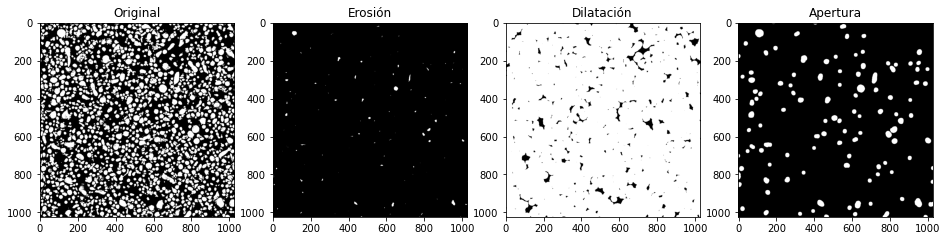

In [12]:
import numpy as np

# Construyo el elemento estructural
r =10
st1 = elem_struct("disk",r)

# erosión
img_eroded = erode(img1_binary,st1)
# dilatación
img_dilated = dilation(img1_binary,st1)
# apertura
img_open = opening(img1_binary,st1)


fig1, axs = plt.subplots(ncols=4,nrows=1, figsize=(16, 16))
axs[0].imshow(img1_binary,cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(img_eroded,cmap='gray')
axs[1].set_title("Erosión")
axs[2].imshow(img_dilated,cmap='gray')
axs[2].set_title("Dilatación")
axs[3].imshow(img_open,cmap='gray')
axs[3].set_title("Apertura")

A continuación evaluamos para una imagen la cantidad de foreground en relación con el tamaño del kernel con el que se realiza la apertura. Se observa que la cantidad de foreground desciende al aumentar el tamaño del kernel. Parece por tanto la apertura una función adecuada para caracterizar muestras de polvo.

Text(0.5, 1.0, 'Foreground [px] / tamaño kernel')

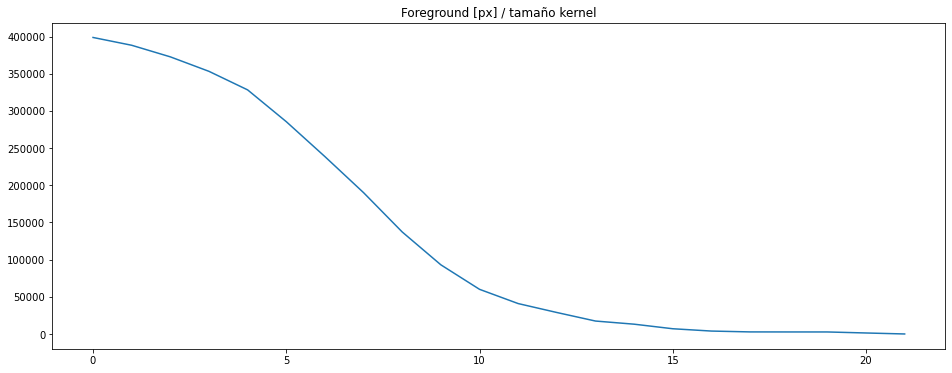

In [13]:
# Prueba del algoritmo para calcular la distribución usando implementación propia de apertura

foreground_size = []
filtered_images = []
foreground_size.append(np.count_nonzero(img1_binary == True))
f_current_size = foreground_size[0]
st_element_size = 1

filtered_images.append(img1_binary)

while(f_current_size > 0):
    st = elem_struct("disk",st_element_size)
    img_filtered = opening(img1_binary,st)
    filtered_images.append(np.array(img_filtered))
    f_current_size = np.count_nonzero(img_filtered == True)
    foreground_size.append(f_current_size)
    st_element_size += 1

    
fig1, axs = plt.subplots(ncols=1, figsize=(16, 6))
axs.plot(foreground_size)
axs.set_title("Foreground [px] / tamaño kernel")

A continuación se caracteriza la imagen 1, obteniedo la cantidad de polvo estimada para cada tamaño.

Text(0, 0.5, '%')

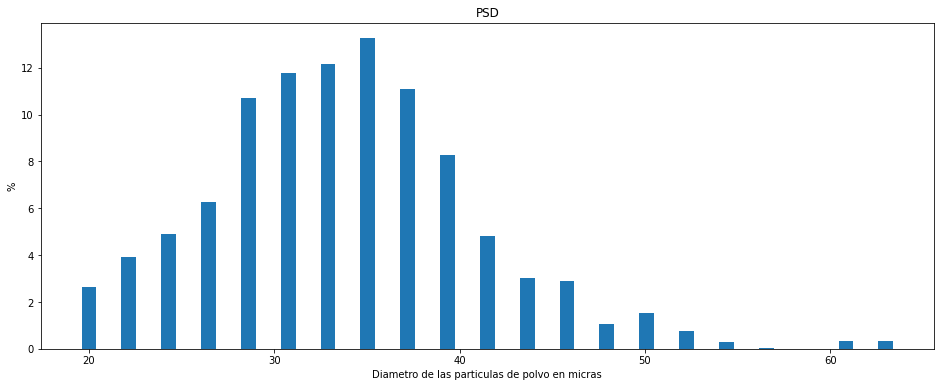

In [14]:
# Estimación de la distribución de polvo en el intervalo conocido de 20 a 61 micras
total_volume = np.count_nonzero(img1_binary == True)

volumes = []

foreground_size_backwards = foreground_size[::-1]
idx=0
for idx, val in enumerate(foreground_size_backwards[1:]):
    volume = val-foreground_size_backwards[idx]
    volumes.append(volume)
    

x = np.linspace(start=20.0, stop=63.0, num=len(volumes))
volumes_percent = (np.array(volumes)/total_volume)*100

fig1, axs = plt.subplots(ncols=1, figsize=(16, 6))
axs.bar(x,volumes_percent[::-1])
axs.set_title("PSD")
axs.set_xlabel("Diametro de las particulas de polvo en micras")
axs.set_ylabel("%")

#### 4. Función para la caracterización de polvo

Por último definimos una función que permita realizar las operaciones de caracterización de forma automática, mostrando el gráfico de distribución e imágenes intermedias del tamizado. Al ir aplicando progresivamente un elemento estructural de mayor tamaño en la operacion de apertura, la diferencia entre dos imágenes consecutivas da como resultado la apreciación del cribado deseado y permitiendo clasificar por tamaños el área correspondiente a cada grupo de partículas.


In [15]:
def psd_polvo(img):
    img_grayscale = rgb2gray(rgba2rgb(img))
    thresh = threshold_yen(img_grayscale)
    img_binary = img_grayscale >= thresh
    images=[]
    cantidad_polvo=[]
    diametro_r=[]
    percent=[]
    total_fore = np.count_nonzero(img1_binary == True)
    images.append(img_binary)
    for i in range(1,20):# se aplica la operacion de APERTURA cada vez con un radio mayor en el rango deseado
        r = i
        st_element = elem_struct("disk",r)

        images.append(opening(images[i-1],st_element))
        diametro_r.append(r)
        if(i>=1):
            cantidad_polvo.append(images[i-1].sum()-images[i].sum()) #diferencia entre dos imagenes operadas consecutivas 
            percent.append((cantidad_polvo[i-1]*100)/total_fore)
            

    # representación del filtrado o tamizado gradual que supone ir aplicando la operacion de apertura don elementro
    # estructural cada vez mayor       
    fig1, axs = plt.subplots(ncols=5,nrows=4, figsize=(15, 15))    
    iterador=0
    for i in range(4):
        for j in range(5):
            axs[i][j].imshow(images[iterador],cmap='gray')
            axs[i][j].set_title('Radio:' + str(iterador+1))
            iterador +=1

    ##representacion de las areas correspondientes a distintos radios de particulas, frente al radio del ES usado
    #fig2, axs = plt.subplots(ncols=1, figsize=(16, 6)) 
    #axs.bar(diametro_r,cantidad_polvo)
    #axs.set_title("Cantidad área Polvo/ Diametro ES")
    
    #representacion en porcentaje sobre el total de foregraound
    
    
    fig3, axs = plt.subplots(ncols=1, figsize=(16, 6))
    axs.bar(diametro_r,percent)
    axs.set_title("PSD")
    axs.set_xlabel("Radio del elemento estructural en píxeles")
    axs.set_ylabel("%")
    

#### 5. Caracterización de diferentes muestras
#### 5.1 Caracterización de polvo PSD para Imagen 1

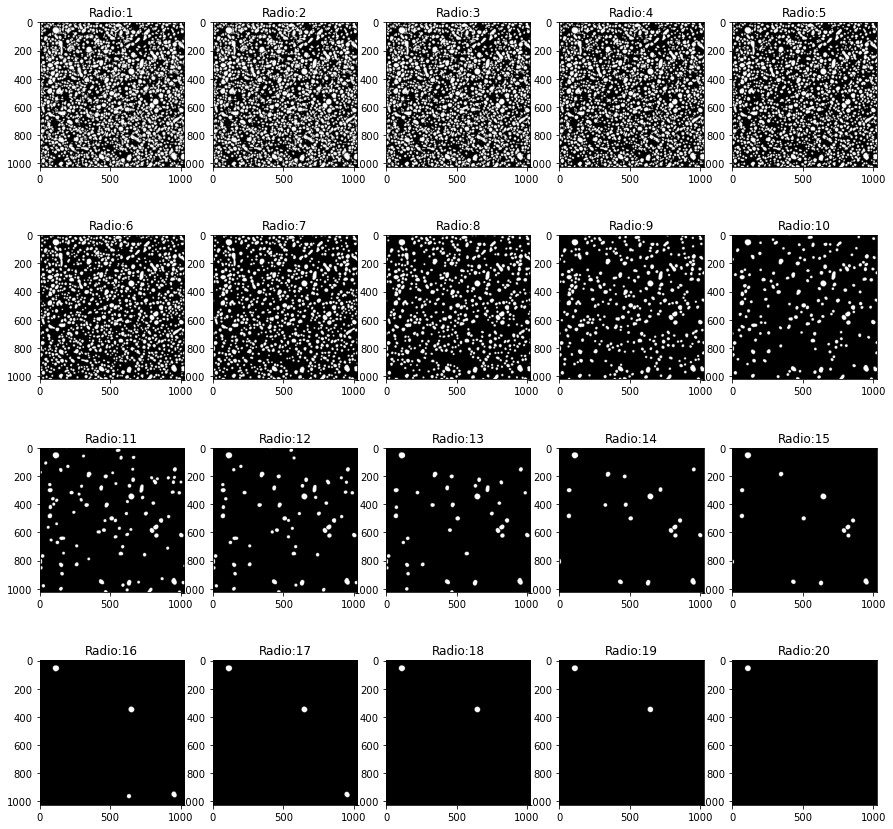

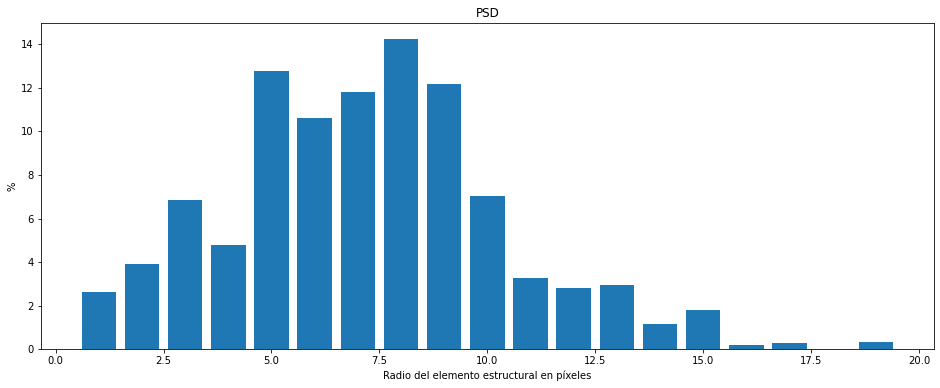

In [16]:
psd_polvo(img1)

#### 5.2 Caracterización de polvo PSD para Imagen 2

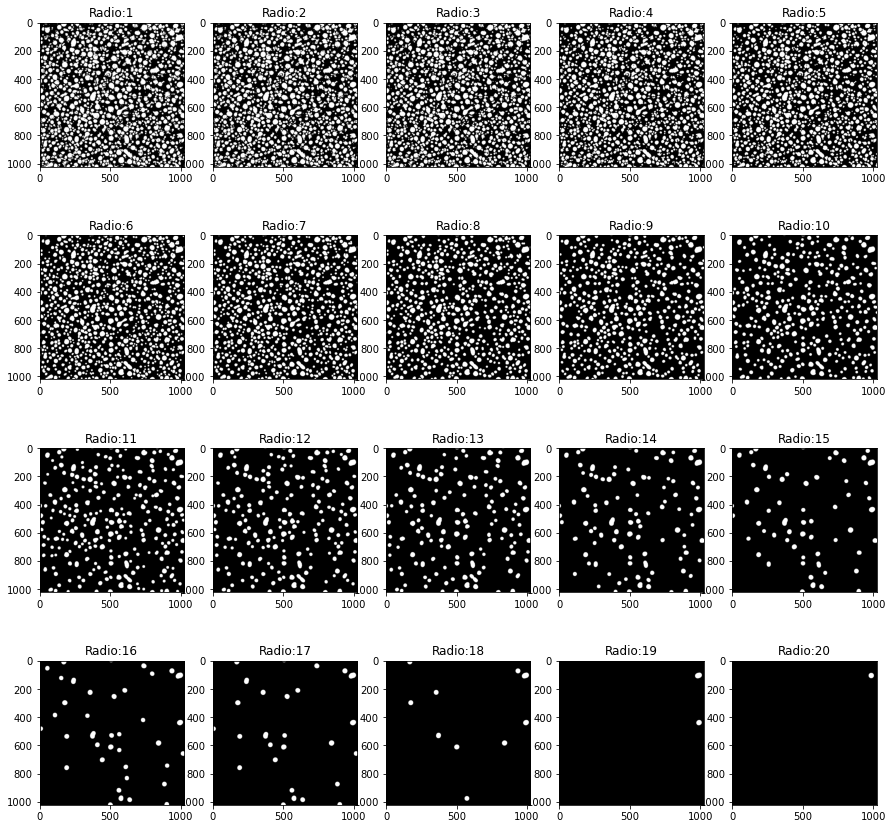

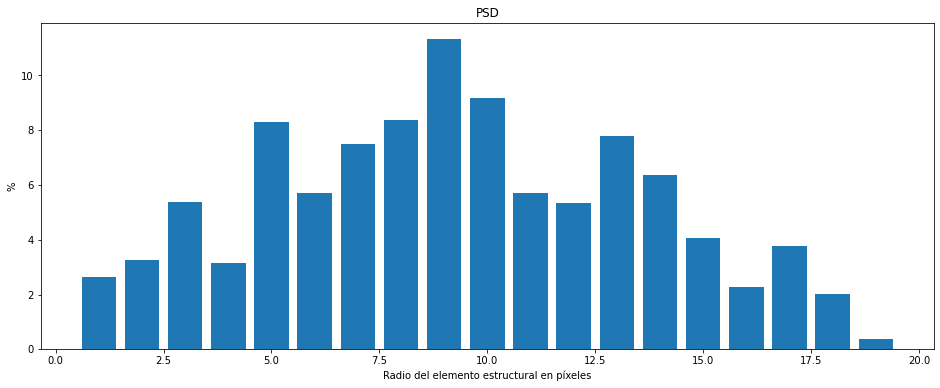

In [17]:
psd_polvo(img2)

#### 5.3 Caracterización de polvo PSD para Imagen 3

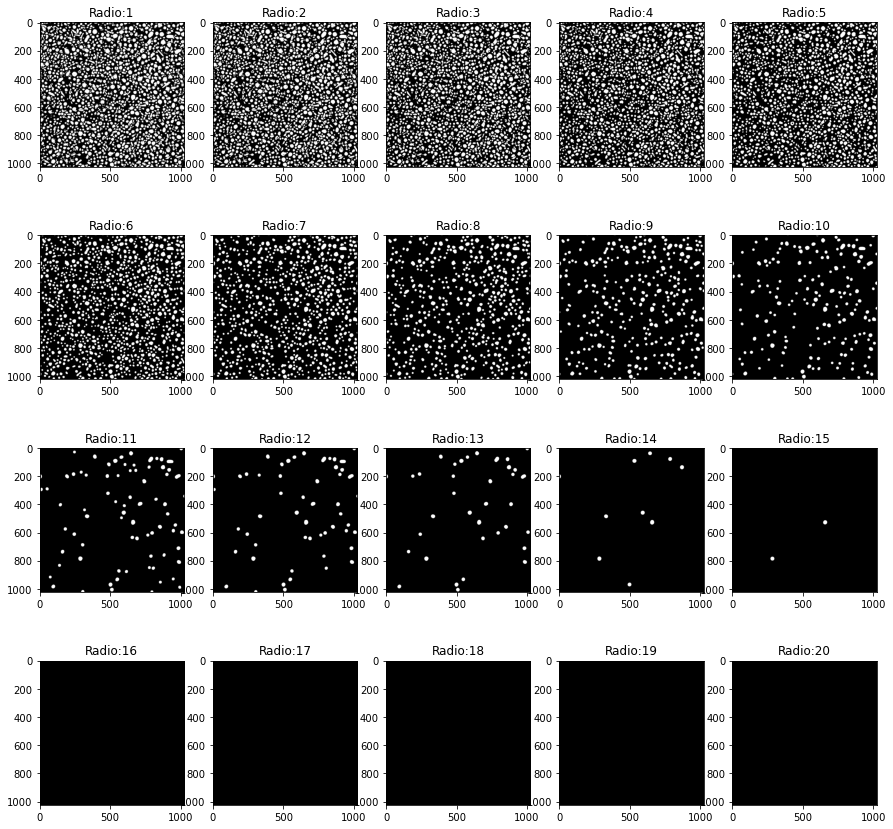

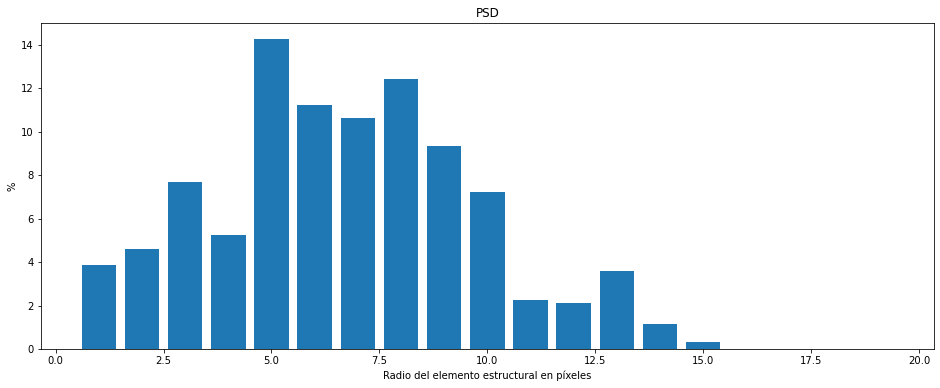

In [18]:
psd_polvo(img3)

#### 6. Conclusiones
-La función apertura actúa como filtro demostrándose útil para un tamizado de muestras de polvo. 

-Para muestras con diferentes formas de grano podrían evaluarse diferentes kernels. 

-Se ha comprobado la importancia de la eficiencia de los algoritmos de procesamiento de imagen.
